In [2]:
import pandas as pd
df = pd.read_excel("/crop yield data sheet.xlsx")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [5]:
df.shape

(109, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [7]:
df.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


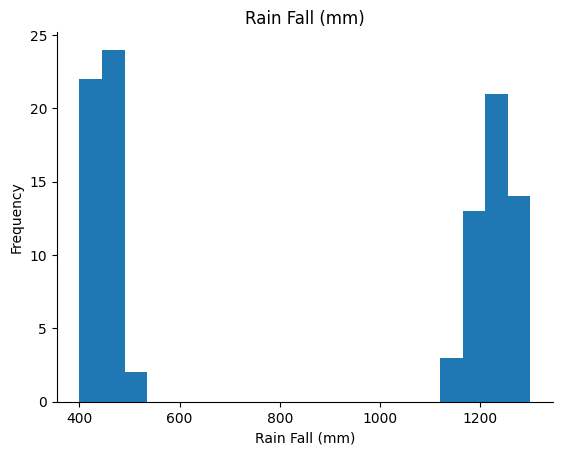

In [11]:
# @title Rain Fall (mm)

def plot_histogram_with_settings(data, column, bins=20):
    data[column].plot(kind='hist', bins=bins, title=column)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram_with_settings(df, 'Rain Fall (mm)', bins=20)

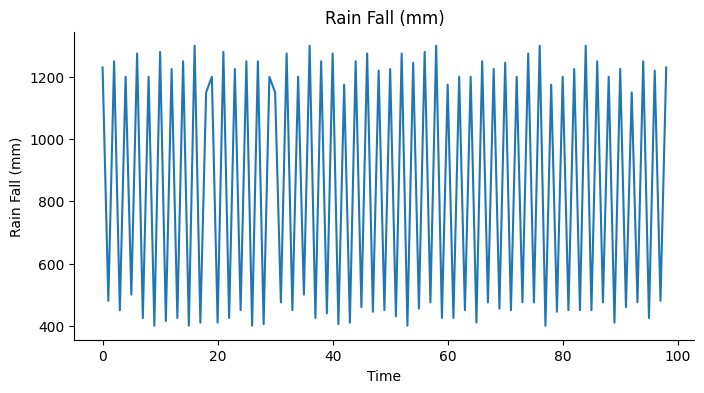

In [8]:
# @title Rain Fall (mm)

def plot_rainfall_line(data):
    data['Rain Fall (mm)'].plot(kind='line', figsize=(8, 4), title='Rain Fall (mm)')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.xlabel('Time')
    plt.ylabel('Rain Fall (mm)')
    plt.show()


plot_rainfall_line(df)

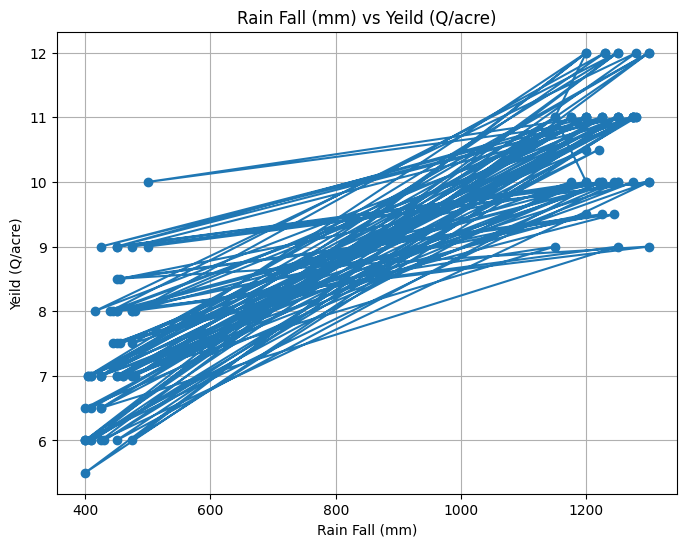


Correlation coefficient between 'Rain Fall (mm)' and 'Yeild (Q/acre)': 0.89


In [9]:
# @title Rain fall (mm) Vs Yeild (Q/acre)

# Function for Line Graph and Correlation Coefficient
def plot_line_graph(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    plt.plot(data[x_column], data[y_column], marker='o', linestyle='-')
    plt.title(f'{x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

    # Calculate and display correlation coefficient
    correlation_coefficient = data[x_column].corr(data[y_column])
    print(f"\nCorrelation coefficient between '{x_column}' and '{y_column}': {correlation_coefficient:.2f}")

plot_line_graph(df, 'Rain Fall (mm)', 'Yeild (Q/acre)')

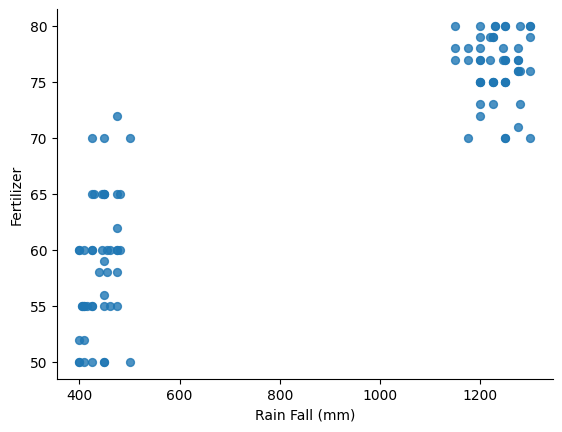

In [10]:
# @title Rain Fall (mm) vs Fertilizer

def scatter_plot_with_settings(data, x_column, y_column, marker_size=32, transparency=0.8):
    data.plot(kind='scatter', x=x_column, y=y_column, s=marker_size, alpha=transparency)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

scatter_plot_with_settings(df, 'Rain Fall (mm)', 'Fertilizer')

<ipython-input-12-c7838b20b74b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


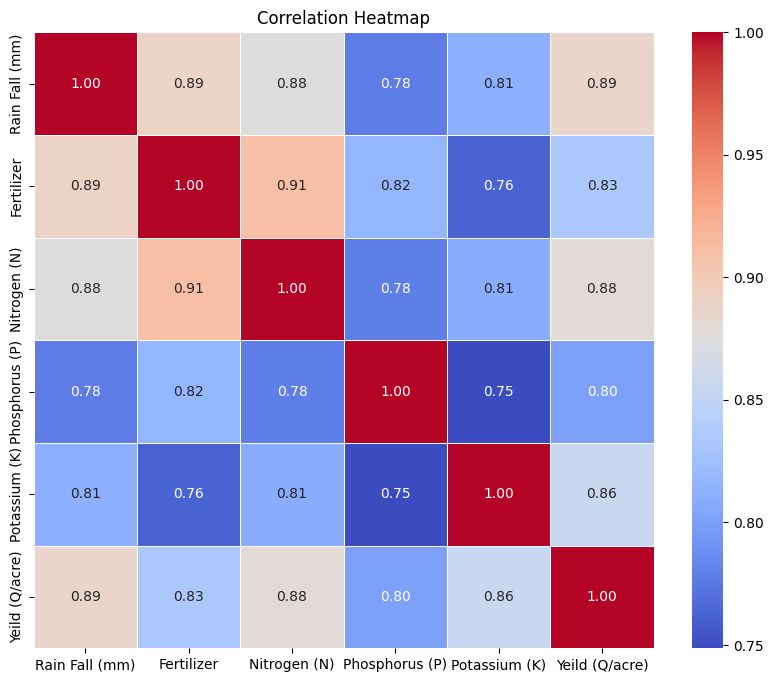

In [12]:
def correlation_heatmap(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

correlation_heatmap(df)